In [1]:
import numpy as np
from matplotlib import pyplot as plt
import corner

In [12]:
# lmc = np.genfromtxt('catRawMags20Aug/sgCut_LMCwErr.dat',names=True)
# mw = np.genfromtxt('catRawMags20Aug/sgCut_MWwErr.dat',names=True)
evr = np.genfromtxt('catRawMags20Aug/sgCut_LMCwErrTC.dat',names=True)

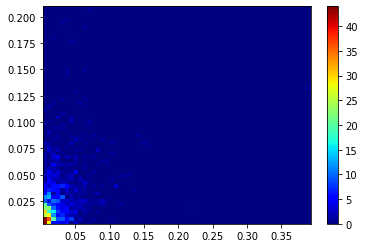

In [13]:
hist_err, xedge, yedge, image = plt.hist2d(evr['errf606w'],evr['errf814w'],bins=60,cmap='jet')
plt.colorbar()
plt.show()

In [26]:
keep = evr['errf606w']!=evr['errf606w']
for vv in range(len(xedge)-1):
    for ii in range(len(yedge)-1):
        if hist_err[vv,ii] >= 10:
            temp_keep = np.logical_and(np.logical_and(xedge[vv]<evr['errf606w'],evr['errf606w']<xedge[vv+1]), 
                                       np.logical_and(yedge[ii]<evr['errf814w'],evr['errf814w']<yedge[ii+1]))
            keep = np.logical_or(keep,temp_keep)

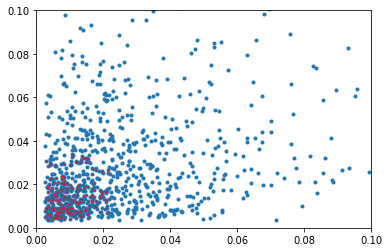

In [27]:
fig,ax = plt.subplots()

ax.scatter(evr['errf606w'],evr['errf814w'],marker='.')
ax.scatter(evr['errf606w'][keep],evr['errf814w'][keep],marker='.',color='red',s=0.5)

ax.set_xlim(0,0.1)
ax.set_ylim(0,0.1)
plt.show()

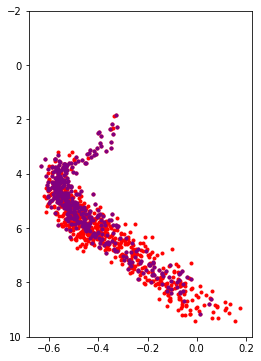

In [28]:
fig, ax = plt.subplots(figsize=(4,6))


ax.scatter(evr['f606w']-evr['f814wn'],
           evr['f606w'],marker='.',color='red')
ax.scatter(evr['f606w'][keep]-evr['f814wn'][keep],
           evr['f606w'][keep],marker='.',color='purple')

ax.set_ylim(10,-2)
# ax.set_xlim(-2,2)

plt.show()

In [29]:
cleanF606W = evr['f606w'][keep]
cleanF814W = evr['f814wn'][keep]
cleanErr606 = evr['errf606w'][keep]
cleanErr814 = evr['errf814w'][keep]

In [30]:
id_arr = np.arange(0,len(cleanF606W),1,dtype=int)
mass1_arr = np.zeros(len(cleanF606W))
mass_rat = np.zeros(len(cleanF606W))
stage_arr = np.ones(len(cleanF606W),dtype=int)
prior_arr = np.full((len(cleanF606W)),0.999)
dbi_arr = np.ones(len(cleanF606W))

In [31]:
out_arr = np.array([id_arr,cleanF606W,cleanF814W,cleanErr606,cleanErr814,
               mass1_arr,mass_rat,stage_arr,prior_arr,
               dbi_arr])

In [32]:
np.savetxt("/usr/local/bin/base-9/phot1703/cleanLMC.phot",out_arr.T,
           header="ID F606W F814W sigF606W sigF814W mass1 massRatio stage CMPrior useDBI",
          fmt='%d %.3f %.3f %.3f %.3f %.1f %.1f %d %.3f %d')

In [38]:
def median_interval(data, alpha=0.32):
    """
    Median including Bayesian credible interval.

    Parameters
    ----------
    data  : posterior samples
    alpha : 1 - confidence interval

    Returns
    -------
    [med,[lo, hi]] : median, lower, and upper percentiles
    
    """
    q = [100*alpha/2., 50, 100*(1-alpha/2.)]
    lo,med,hi = np.percentile(data,q)
    return [med,[lo,hi]]

In [34]:
results2 = np.genfromtxt("/usr/local/bin/base-9/ALL2/fm-15age125/rf2_fixedDist.res",names=True)

# results2 = np.genfromtxt("/usr/local/bin/base-9/bootesI/results06_07_simDat/distmod.res",names=True)

In [35]:
results2.dtype.names

('logAge', 'Y', 'FeH', 'modulus', 'absorption', 'logPost', 'stage')

In [36]:
ndim = 2
nsamples = len(results2)

metal = results2['FeH'][:,None]
age = results2['logAge'][:,None]
# yPar = results2['Y'][:,None]
abso = results2['absorption'][:,None]
# dist = results2['modulus'][:,None]

samples = np.hstack([metal,age,abso])

In [39]:
metal,[metal_min,metal_max] = median_interval(samples[:,0])
age,[age_min,age_max] = median_interval(samples[:,1])
# yPar,[yPar_min,yPar_max] = median_interval(samples[:,2])
abso,[abso_min,abso_max] = median_interval(samples[:,2])

In [41]:
print(metal,metal_max-metal,metal-metal_min)
print(age,age_max-age,age-age_min)
# print(yPar,yPar_max-yPar,yPar-yPar_min)

-1.810974 0.3479539999999999 0.5344659999999999
10.094970499999999 0.02025050000000128 0.021136819999998835


In [95]:
print(metal,metal_max-metal,metal-metal_min)
print(age,age_max-age,age-age_min)
print(yPar,yPar_max-yPar,yPar-yPar_min)

-2.562654 0.28584400000000043 0.14256599999999997
10.136395 0.018708719999999346 0.01627600000000129
0.190526 0.21263471999999997 0.19345203999999996


In [43]:
10**(10.09)

12302687708.123812

In [67]:
len(samples)

11550

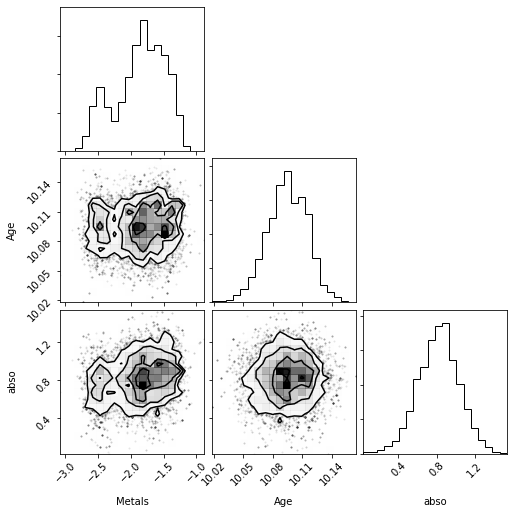

In [42]:
fig = corner.corner(samples, labels=["Metals", 
                                         "Age","abso"])

In [ ]:
fig = corner.corner(samples,labels=['Fe/H','logAge','m-M'],
              quantiles=(0.16, 0.84),range=[(0.16,0.84),(0.16,0.84),(0.16,0.84)],
                    show_titles=True,title_kwargs={"fontsize": 12})
#  show_titles=True,max_n_ticks=4,fill_contours=False,plot_density=False,
#                     plot_datapoints=True,

